In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt




dogs_train = tfds.load("stanford_dogs", split="train", as_supervised=True)
dogs_test = tfds.load("stanford_dogs", split="test", as_supervised=True)

img_size = (128, 128)
img_full_size = (128, 128, 3)


In [7]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

def preprocess(image, label):
  image = tf.image.resize(image, (128, 128))
  image = data_augmentation(image)
  image /= 255.0
  return image, label

# dogs_train = dogs_train.map(preprocess).batch(32)
# dogs_test = dogs_test.map(preprocess).batch(32)

dogs_train = dogs_train.shuffle(1000).map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
dogs_test = dogs_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)



In [8]:
my_model = MobileNetV2(input_shape=img_full_size, weights='imagenet', include_top=False)
#model is already trained, so should not train the current layers
for layer in my_model.layers:
    layer.trainable = False

In [9]:
gap = layers.GlobalAveragePooling2D()(my_model.output)
dense = layers.Dense(256, activation='relu')(gap)
drop = layers.Dropout(0.5)(dense)
prediction = layers.Dense(120, activation='softmax')(drop)

model = models.Model(inputs=my_model.input, outputs=prediction)

model.compile(optimizer=Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
callbacks = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint("best_model.h5", save_best_only=True)]

history = model.fit(dogs_train, validation_data=dogs_test, epochs=20, callbacks=callbacks)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.0166 - loss: 5.0183

375/375 ━━━━━━━━━━━━━━━━━━━━ 156s 386ms/step - accuracy: 0.0166 - loss: 5.0176 - val_accuracy: 0.1140 - val_loss: 4.2998
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.0905 - loss: 4.2308

375/375 ━━━━━━━━━━━━━━━━━━━━ 195s 383ms/step - accuracy: 0.0906 - loss: 4.2304 - val_accuracy: 0.2760 - val_loss: 3.4224
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2002 - loss: 3.5298

375/375 ━━━━━━━━━━━━━━━━━━━━ 202s 383ms/step - accuracy: 0.2003 - loss: 3.5295 - val_accuracy: 0.3645 - val_loss: 2.8157
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2608 - loss: 3.0780

375/375 ━━━━━━━━━━━━━━━━━━━━ 164s 279ms/step - accuracy: 0.2608 - loss: 3.0779 - val_accuracy: 0.4149 - val_loss: 2.4925
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3125 - loss: 2.7977

375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 280ms/step - accuracy: 0.3125 - loss: 2.7976 - val_accuracy: 0.4358 - val_loss: 2.2977
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3439 - loss: 2.6040

375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 281ms/step - accuracy: 0.3439 - loss: 2.6040 - val_accuracy: 0.4528 - val_loss: 2.1895
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3699 - loss: 2.4529

375/375 ━━━━━━━━━━━━━━━━━━━━ 180s 384ms/step - accuracy: 0.3699 - loss: 2.4528 - val_accuracy: 0.4693 - val_loss: 2.0982
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.3827 - loss: 2.3800

375/375 ━━━━━━━━━━━━━━━━━━━━ 202s 384ms/step - accuracy: 0.3827 - loss: 2.3799 - val_accuracy: 0.4747 - val_loss: 2.0554
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3981 - loss: 2.2858

375/375 ━━━━━━━━━━━━━━━━━━━━ 163s 281ms/step - accuracy: 0.3981 - loss: 2.2858 - val_accuracy: 0.4742 - val_loss: 2.0045
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4262 - loss: 2.1851

375/375 ━━━━━━━━━━━━━━━━━━━━ 180s 383ms/step - accuracy: 0.4262 - loss: 2.1851 - val_accuracy: 0.4867 - val_loss: 1.9573
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4312 - loss: 2.1431

375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 280ms/step - accuracy: 0.4312 - loss: 2.1431 - val_accuracy: 0.4858 - val_loss: 1.9260
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4439 - loss: 2.0832

375/375 ━━━━━━━━━━━━━━━━━━━━ 181s 384ms/step - accuracy: 0.4439 - loss: 2.0832 - val_accuracy: 0.4944 - val_loss: 1.8973
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4482 - loss: 2.0432

375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 281ms/step - accuracy: 0.4482 - loss: 2.0432 - val_accuracy: 0.5073 - val_loss: 1.8647
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 383ms/step - accuracy: 0.4628 - loss: 1.9846 - val_accuracy: 0.4997 - val_loss: 1.8706
Epoch 15/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4776 - loss: 1.9371

375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 279ms/step - accuracy: 0.4776 - loss: 1.9371 - val_accuracy: 0.5056 - val_loss: 1.8466
Epoch 16/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.4755 - loss: 1.9269

375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 279ms/step - accuracy: 0.4755 - loss: 1.9269 - val_accuracy: 0.5034 - val_loss: 1.8417
Epoch 17/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4908 - loss: 1.8588

375/375 ━━━━━━━━━━━━━━━━━━━━ 107s 282ms/step - accuracy: 0.4908 - loss: 1.8589 - val_accuracy: 0.5044 - val_loss: 1.8283
Epoch 18/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.4963 - loss: 1.8490

375/375 ━━━━━━━━━━━━━━━━━━━━ 143s 285ms/step - accuracy: 0.4963 - loss: 1.8490 - val_accuracy: 0.5115 - val_loss: 1.7964
Epoch 19/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 179s 384ms/step - accuracy: 0.5129 - loss: 1.8112 - val_accuracy: 0.5115 - val_loss: 1.8029
Epoch 20/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 164s 282ms/step - accuracy: 0.5131 - loss: 1.7890 - val_accuracy: 0.5115 - val_loss: 1.7995


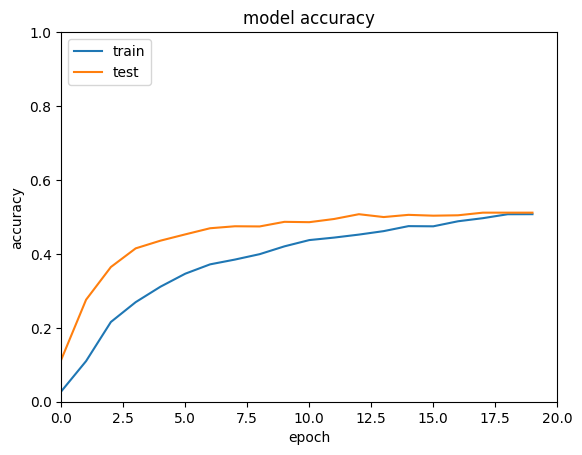

In [12]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,20])
plt.ylim([0.0,1.0])
plt.show()